In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_basic=pd.read_csv(r"C:\Users\Latha E\Heart_ML\datasets\heart_disease_cleaned_basic.csv")
df_advanced=pd.read_csv(r"C:\Users\Latha E\Heart_ML\datasets\heart_disease_cleaned_advanced.csv")
df_optimized=pd.read_csv(r"C:\Users\Latha E\Heart_ML\datasets\_optimized_advanced_heart_disease_cleaned.csv")


In [3]:
df_advanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  920 non-null    float64
 5   chol      920 non-null    float64
 6   fbs       920 non-null    bool   
 7   restecg   920 non-null    object 
 8   thalch    920 non-null    float64
 9   exang     920 non-null    bool   
 10  oldpeak   920 non-null    float64
 11  slope     920 non-null    int64  
 12  ca        920 non-null    int64  
 13  thal      920 non-null    int64  
 14  target    920 non-null    int64  
dtypes: bool(2), float64(4), int64(5), object(4)
memory usage: 95.4+ KB


Check for categorical features


In [4]:

cat_cols_basic = df_basic.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns of Basic Dataset:", cat_cols_basic.to_list())

cat_cols_advanced = df_advanced.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns of Advanced Dataset:", cat_cols_advanced.to_list())

cat_cols_optimized = df_optimized.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns of Optimized Dataset:", cat_cols_optimized.to_list())


Categorical Columns of Basic Dataset: ['sex', 'dataset', 'cp', 'restecg']
Categorical Columns of Advanced Dataset: ['sex', 'dataset', 'cp', 'restecg']
Categorical Columns of Optimized Dataset: ['sex', 'dataset', 'cp', 'restecg']


In [5]:
# Function to encode categorical variables
from sklearn.preprocessing import LabelEncoder
def encode_categorical(df):
    df = df.copy()
    
    # Label Encoding for binary categorical columns
    label_cols = ['sex', 'fbs', 'restecg', 'exang']
    le = LabelEncoder()
    for col in label_cols:
        df[col] = le.fit_transform(df[col])  # Convert to 0/1
    
    # One-Hot Encoding for nominal categorical columns
    one_hot_cols = ['dataset', 'cp']
    df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)  # Avoid dummy variable trap

    # Convert boolean to integer (0/1)
    df = df.astype(int)

    # Rename columns to avoid spaces
    df.columns = df.columns.str.replace(' ', '_')

    return df

In [6]:
# Apply encoding to all datasets
df_basic = encode_categorical(df_basic)
df_advanced = encode_categorical(df_advanced)
df_optimized = encode_categorical(df_optimized)

# Ensure all datasets have the same columns
common_cols = list(set(df_basic.columns) & set(df_advanced.columns) & set(df_optimized.columns))
df_basic = df_basic[common_cols]
df_advanced = df_advanced[common_cols]
df_optimized = df_optimized[common_cols]

In [7]:
# Verify the transformed data
print(df_basic.head())
print(df_advanced.head())
print(df_optimized.head())


   target  exang  dataset_Switzerland  sex  age  dataset_Hungary  trestbps  \
0       0      0                    0    1   63                0       145   
1       2      1                    0    1   67                0       160   
2       1      1                    0    1   67                0       120   
3       0      0                    0    1   37                0       130   
4       0      0                    0    0   41                0       130   

   dataset_VA_Long_Beach  fbs  chol  oldpeak  thalch  cp_typical_angina  \
0                      0    1   233        2     150                  1   
1                      0    0   286        1     108                  0   
2                      0    0   229        2     129                  0   
3                      0    0   250        3     187                  0   
4                      0    0   204        1     172                  0   

   restecg  cp_non-anginal  cp_atypical_angina  
0        0               0     

In [8]:
import pandas as pd

# Save the datasets as CSV files in the current directory
df_basic.to_csv("converted_heart_disease_cleaned_basic.csv", index=False)
df_advanced.to_csv("converted_heart_disease_cleaned_advanced.csv", index=False)
df_optimized.to_csv("converted_optimized_advanced_heart_disease_cleaned.csv", index=False)

print("Datasets have been saved successfully!")


Datasets have been saved successfully!


PCA

In [9]:
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
# Load datasets
df_pca_basic = pd.read_csv(r"C:\Users\Latha E\Heart_ML\datasets\converted_heart_disease_cleaned_basic.csv")
df_pca_advanced = pd.read_csv(r"C:\Users\Latha E\Heart_ML\datasets\converted_heart_disease_cleaned_basic.csv")
df_pca_optimized = pd.read_csv(r"C:\Users\Latha E\Heart_ML\datasets\converted_optimized_advanced_heart_disease_cleaned.csv")

In [11]:
def preprocess_and_apply_pca(df, dataset_name, drop_columns):
    # Drop specified non-relevant categorical columns
    df = df.drop(columns=[col for col in drop_columns if col in df.columns])

    # Drop target column before PCA
    if 'target' in df.columns:
        df_numeric = df.drop(columns=['target']).select_dtypes(include=[np.number])
    else:
        df_numeric = df.select_dtypes(include=[np.number])
    
    # Standardize the features
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_numeric)
    
    # Compute Correlation Matrix (before PCA)
    corr_matrix = pd.DataFrame(df_numeric.corr())
    print(f"Correlation Matrix for {dataset_name} Dataset:\n", corr_matrix, "\n")
    
    # Apply PCA
    pca = PCA()
    principal_components = pca.fit_transform(df_scaled)
    
    # Explained Variance
    explained_variance = np.cumsum(pca.explained_variance_ratio_)
    
    # Store PCA model and transformed data
    return pca, principal_components, df_numeric

# List of dataset-related features to remove
drop_columns = ['dataset_Hungary', 'dataset_Switzerland', 'dataset_VA_Long_Beach', 'dataset_Cleveland']

# Apply PCA without dataset columns
pca_basic, pc_basic, df_pca_basic = preprocess_and_apply_pca(df_basic, "Basic", drop_columns)
pca_advanced, pc_advanced, df_pca_advanced = preprocess_and_apply_pca(df_advanced, "Advanced", drop_columns)
pca_optimized, pc_optimized, df_pca_optimized = preprocess_and_apply_pca(df_optimized, "Optimized", drop_columns)

def get_top_features(pca_model, df_numeric, dataset_name, top_n=5):
    """ Display the top contributing features for each principal component. """
    components = pd.DataFrame(pca_model.components_, columns=df_numeric.columns)

    print(f"\n🔹 Top {top_n} Contributing Features per Principal Component ({dataset_name})")
    for i, comp in enumerate(components.iterrows()):
        top_features = comp[1].abs().nlargest(top_n).index.tolist()
        print(f"PC{i+1}: {top_features}")

# Call the function for each dataset using correct variable names
print("\n🔹 Feature Contributions after PCA")
get_top_features(pca_basic, df_pca_basic.select_dtypes(include=[np.number]), "Basic")
get_top_features(pca_advanced, df_pca_advanced.select_dtypes(include=[np.number]), "Advanced")
get_top_features(pca_optimized, df_pca_optimized.select_dtypes(include=[np.number]), "Optimized")


# Get top features for each principal component
print("\n🔹 Feature Contributions after PCA (Updated - Without Dataset Features)")
get_top_features(pca_basic, df_pca_basic, "Basic")
get_top_features(pca_advanced, df_pca_advanced, "Advanced")
get_top_features(pca_optimized, df_pca_optimized, "Optimized")


Correlation Matrix for Basic Dataset:
                        exang       sex       age  trestbps       fbs  \
exang               1.000000  0.155204  0.160910  0.153835 -0.003475   
sex                 0.155204  1.000000  0.056889 -0.002145  0.075370   
age                 0.160910  0.056889  1.000000  0.230784  0.219915   
trestbps            0.153835 -0.002145  0.230784  1.000000  0.143709   
fbs                -0.003475  0.075370  0.219915  0.143709  1.000000   
chol               -0.033914 -0.194029 -0.086010  0.089484  0.089316   
oldpeak             0.404440  0.086487  0.191106  0.159312  0.019992   
thalch             -0.354173 -0.174590 -0.349715 -0.104747 -0.026472   
cp_typical_angina  -0.122665 -0.003668  0.032032  0.044407  0.043298   
restecg             0.026067  0.072160 -0.006652  0.010263  0.025788   
cp_non-anginal     -0.188592 -0.064031 -0.010060 -0.041872  0.002931   
cp_atypical_angina -0.275011 -0.165400 -0.218902 -0.043835 -0.062963   

                        

In [12]:
print("Explained Variance Ratio:", pca_basic.explained_variance_ratio_)

    

Explained Variance Ratio: [0.18967318 0.11897182 0.1076299  0.09759204 0.09049664 0.07737514
 0.07136677 0.06559716 0.05510822 0.0516359  0.03951041 0.03504282]


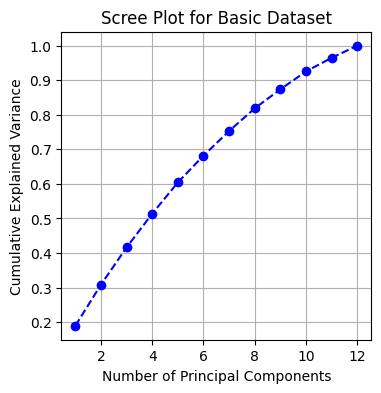

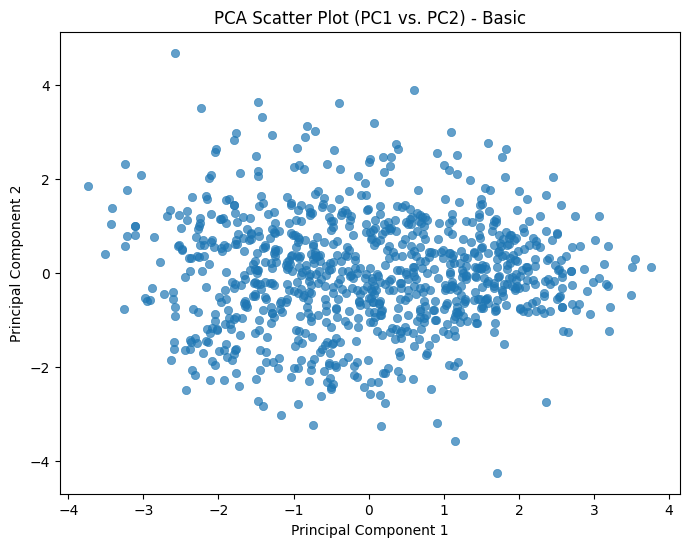

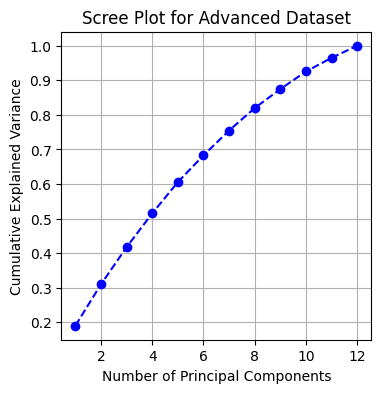

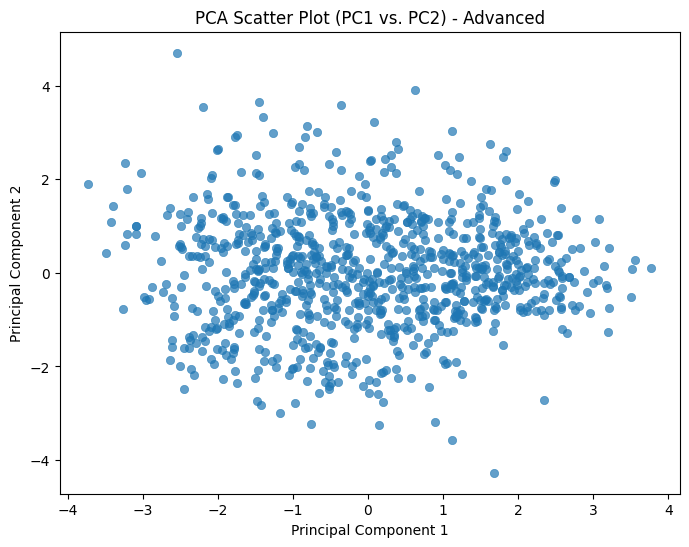

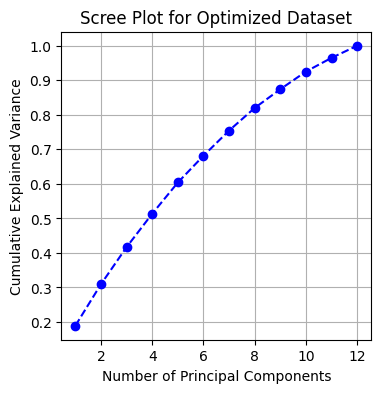

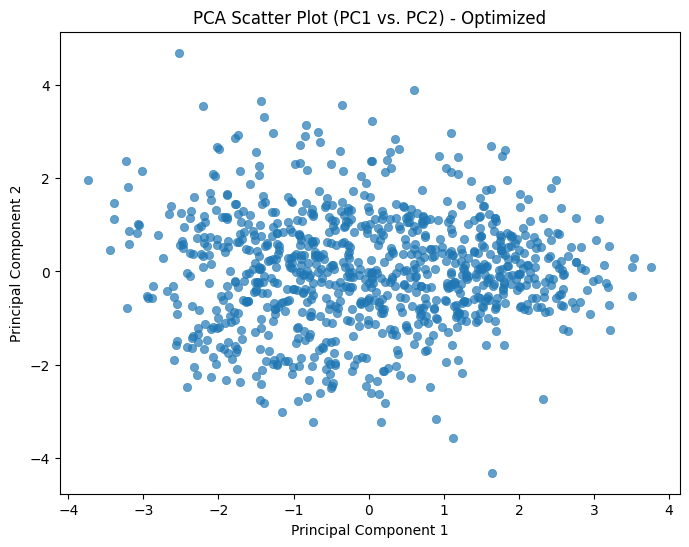

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_pca_results(pca_model, pc_transformed, dataset_name):
    # Scree Plot (Explained Variance)
    plt.figure(figsize=(4, 4))
    explained_variance = np.cumsum(pca_model.explained_variance_ratio_)
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title(f'Scree Plot for {dataset_name} Dataset')
    plt.grid()
    plt.show()

    # 2D Scatter Plot (PC1 vs. PC2)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pc_transformed[:, 0], y=pc_transformed[:, 1], alpha=0.7, edgecolor=None)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(f'PCA Scatter Plot (PC1 vs. PC2) - {dataset_name}')
    plt.show()

# Visualize PCA results for all datasets
plot_pca_results(pca_basic, pc_basic, "Basic")
plot_pca_results(pca_advanced, pc_advanced, "Advanced")
plot_pca_results(pca_optimized, pc_optimized, "Optimized")


In [17]:


# Assuming pca_basic, pca_advanced, pca_optimized are the PCA models for the three datasets
def get_top_features(pca, feature_names, n=5):
    """
    Get the top contributing features for PC1 and PC2.
    """
    components_df = pd.DataFrame(pca.components_, columns=feature_names, index=[f'PC{i+1}' for i in range(len(pca.components_))])
    
    # Get top N features for PC1 and PC2
    top_pc1 = components_df.loc['PC1'].abs().sort_values(ascending=False).head(n)
    top_pc2 = components_df.loc['PC2'].abs().sort_values(ascending=False).head(n)
    
    return top_pc1, top_pc2

# Extract feature names from each dataset
feature_names_basic = df_basic.columns
feature_names_advanced = df_advanced.columns
feature_names_optimized = df_optimized.columns


# Get top contributing features
top_features_basic = get_top_features(pca_basic, feature_names_basic)
top_features_advanced = get_top_features(pca_advanced, feature_names_advanced)
top_features_optimized = get_top_features(pca_optimized, feature_names_optimized)

# Display results
print("Top Features for PC1 and PC2 - Basic Dataset:")
print(top_features_basic)

print("\nTop Features for PC1 and PC2 - Advanced Dataset:")
print(top_features_advanced)

print("\nTop Features for PC1 and PC2 - Optimized Dataset:")
print(top_features_optimized)


ValueError: Shape of passed values is (12, 12), indices imply (12, 16)